In [2]:
# pip install --upgrade pip

In [9]:
pip install pyathena

  Using cached pyathena-3.5.1-py3-none-any.whl.metadata (5.5 kB)
  Using cached urllib3-1.26.18-py2.py3-none-any.whl.metadata (48 kB)
Using cached pyathena-3.5.1-py3-none-any.whl (69 kB)
Using cached urllib3-1.26.18-py2.py3-none-any.whl (143 kB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.199.0 requires protobuf<5.0,>=3.12, but you have protobuf 5.26.1

In [10]:
#pip install sagemaker

In [11]:
pip install --upgrade protobuf

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
import boto3

In [13]:
import sagemaker
import pandas as pd
import numpy as np

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [14]:
import csv, json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display, Image as IImage
from io import StringIO
from pyathena import connect
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Initialize Boto3 Rekognition client

rekognition_client = boto3.client("rekognition")
s3 = boto3.client("s3")

# Detect labels in Traffic sign images

In [16]:
# Define s3 bucket name, prefix and output csv file path

bucket_name = 'finalprojectdata'
prefix_key = 'traffic_signs/'
output_csv_key = 'csv_files/traffic_signs.csv'

In [17]:
# Function to detect text from an image 

def detect_text_from_image(bucket_name, image_key):
    if image_key.endswith('.jpg'):
        rekognition_response = rekognition_client.detect_text(Image={'S3Object': {'Bucket': bucket_name, 'Name': image_key}})
        return rekognition_response

In [18]:
# Get a list of objects in the s3 bucket

# all_results = []

# paginator = s3.get_paginator('list_objects_v2')
# result = paginator.paginate(Bucket=bucket_name, Prefix=prefix_key)

# for page in result:
#     if "Contents" in page:
#         for key in page[ "Contents" ]:
#             keyString = key[ "Key" ]
#             print(keyString)
#             if keyString.endswith('.jpg'):
#                 response = detect_text_from_image(bucket_name, keyString)
#                 all_results.append({'Image': keyString, 'TextDetections': response['TextDetections']})

In [19]:
# # Write aggregated results to a single CSV file

# csv_buffer = StringIO()
# writer = csv.DictWriter(csv_buffer, fieldnames=['Image', 'DetectedText', 'Type', 'Confidence'])
# writer.writeheader()
# for result in all_results:
#     image_key = result['Image']
#     for detection in result['TextDetections']:
#         detected_text = detection['DetectedText']
#         text_type = detection['Type']
#         confidence = detection['Confidence']
#         writer.writerow({'Image': image_key, 'DetectedText': detected_text, 'Type': text_type, 'Confidence': confidence})
        
# # Upload CSV string to S3

# csv_buffer.seek(0)
# s3.put_object(Body=csv_buffer.getvalue(), Bucket=bucket_name, Key=output_csv_key)

# print(f"Text detection results saved to: s3://{bucket_name}/{output_csv_key}")

In [20]:
pip install protobuf==3.20.0

  Using cached protobuf-3.20.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (698 bytes)
Using cached protobuf-3.20.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.26.1
    Uninstalling protobuf-5.26.1:
      Successfully uninstalled protobuf-5.26.1

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import sagemaker

In [22]:
# Create athena database

sess = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sess.default_bucket()
region = boto3.Session().region_name

ingest_create_athena_db_passed = False

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [23]:
# Set Athena database name

database_name = "velocityvision"

In [24]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries

s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [25]:
# Connect to s3 using PyAthena

conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [26]:
# SQL statement to execute

statement = "CREATE DATABASE IF NOT EXISTS {}".format(database_name)
print(statement)
pd.read_sql(statement, conn)

CREATE DATABASE IF NOT EXISTS velocityvision


""


In [27]:
input_data_location = "s3://finalprojectdata/csv_files"

In [28]:
# SQL statement to execute the traffic signs text detection

table_name1 = 'traffic_signs'
pd.read_sql(f'DROP TABLE IF EXISTS {database_name}.{table_name1}', conn)

create_table = f"""
CREATE EXTERNAL TABLE IF NOT EXISTS {database_name}.{table_name1}(
            image_id string,
            detected_text string,
            type string,
            confidence float
            )
            
            ROW FORMAT DELIMITED FIELDS TERMINATED BY ','
            LOCATION '{input_data_location}'
            TBLPROPERTIES ('skip.header.line.count'='1')
"""

pd.read_sql(create_table, conn)

pd.read_sql(f'SELECT * FROM {database_name}.{table_name1} LIMIT 5', conn)

,image_id,detected_text,type,confidence
0,traffic_signs/000000_jpg.rf.b11f308f16626f9f79...,30,LINE,99.548250
1,traffic_signs/000000_jpg.rf.b11f308f16626f9f79...,RYARSH,LINE,99.415030
2,traffic_signs/000000_jpg.rf.b11f308f16626f9f79...,Please reduce,LINE,99.164894
3,traffic_signs/000000_jpg.rf.b11f308f16626f9f79...,your speed,LINE,99.207320
4,traffic_signs/000000_jpg.rf.b11f308f16626f9f79...,30,WORD,99.548250


In [29]:
# SQL statement to filter rows for "WORD" type

query1 = "SELECT * FROM {}.{} WHERE type='WORD'".format(database_name, table_name1)
traffic_signs_df = pd.read_sql(query1, conn)

In [30]:
traffic_signs_df.shape

(22975, 4)

## Checking duplicate values

In [31]:
traffic_signs_df.duplicated().sum()

7993

In [32]:
# Removing duplicate rows

traffic_signs_df.drop_duplicates(inplace = True)
traffic_signs_df.shape

(14982, 4)

In [33]:
traffic_df = traffic_signs_df.groupby(['image_id', 'type']).agg({'detected_text': ' '.join, 'confidence':'max'}).reset_index()
traffic_df.head()

,image_id,type,detected_text,confidence
0,license_plate/license_1/00009e5b390986a0.jpg,WORD,Bel & The Dragen a Eating Ноква Te Days P طنية...,98.897190
1,license_plate/license_1/00009e5b390986a0_jpg.r...,WORD,MG Dr Bragan Joseph SANG P -,87.967316
2,license_plate/license_1/00009e5b390986a0_jpg.r...,WORD,15 118 and التحج your,83.933174
3,license_plate/license_1/00009e5b390986a0_jpg.r...,WORD,M 10r Вори People Rainy,57.783930
4,license_plate/license_1/0002a5b67e5f0909_jpg.r...,WORD,и Andrews Church DS00 PCZ,98.522736


In [34]:
# SQL statement to execute the analysis of vehicle speed

table_name2 = 'vehicle_speed'
pd.read_sql(f'DROP TABLE IF EXISTS {database_name}.{table_name2}', conn)

create_table = f"""
CREATE EXTERNAL TABLE IF NOT EXISTS {database_name}.{table_name2}(
             latitude float,
             longitude float,
             target_speed float,
             way_maxspeed float,
             speed_osrm float,
             elevation float,
             fwd_azimuth float,
             way_type string,
             way_surface string,
             node_intersection string,
             node_railway string,
             node_crossing string,
             node_highway string,
             node_stop string,
             start_stop int,
             azimuth_diff int,
             elevation_diff float
             )
             
             ROW FORMAT DELIMITED FIELDS TERMINATED BY ','
             LOCATION 's3://finalprojectdata/vehicle_speed'
             TBLPROPERTIES ('skip.header.line.count'='1')
"""

pd.read_sql(create_table, conn)

""


In [35]:
vehicle_speed_df = pd.read_sql(f'SELECT * FROM {database_name}.{table_name2}', conn)
vehicle_speed_df.head()

,latitude,longitude,target_speed,way_maxspeed,speed_osrm,elevation,fwd_azimuth,way_type,way_surface,node_intersection,node_railway,node_crossing,node_highway,node_stop,start_stop,azimuth_diff,elevation_diff
0,50.397060,14.913273,39.739456,130.0,28.837246,229.77516,46.24135,motorway,asphalt,,,,,,0,0.0,-0.025587
1,50.397068,14.913283,39.717785,130.0,28.875628,229.74959,46.24135,motorway,asphalt,,,,,,0,0.0,-0.025587
2,50.397076,14.913294,39.696114,130.0,28.914007,229.72400,46.24135,motorway,asphalt,,,,,,0,0.0,-0.025587
3,50.397080,14.913303,39.674442,130.0,28.952387,229.69841,46.24135,motorway,asphalt,,,,,,0,0.0,-0.025587
4,50.397087,14.913314,39.652770,130.0,28.990767,229.67282,46.24135,motorway,asphalt,,,,,,0,0.0,-0.025587


# Exploratory Data Analysis

In [36]:
vehicle_speed_df.shape

(12165, 17)

Text(0, 0.5, 'Count')

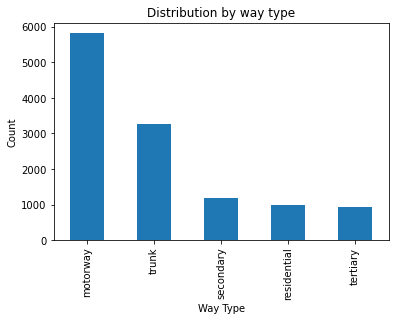

In [37]:
# Distrubition by Way type

vehicle_speed_df['way_type'].value_counts().plot(kind="bar", title="Distribution by way type")
plt.xlabel("Way Type")
plt.ylabel("Count")

# Correlation

Lets study the correlation between different attributes in the dataset

<AxesSubplot:>

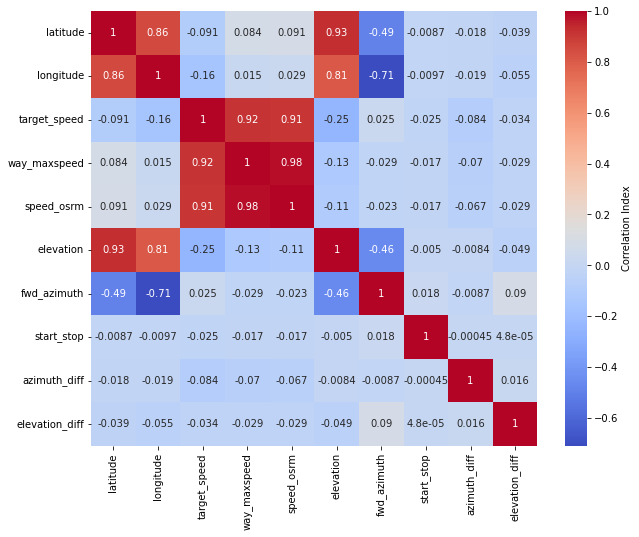

In [38]:
corr = vehicle_speed_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm', cbar_kws={'label': 'Correlation Index'})

From the above correlation Heatmap, it is observed that the below predictors are highly correlated.
(1) latitude and elevation
(2) target_speed and way_maxspeed
(3) way_maxspeed and speed_osrm
(4) target_speed and elevation

# 2. Data Preprocessing

## 2.1. Handling Missing Values

In [39]:
vehicle_speed_df.isnull().sum()

latitude             0
longitude            0
target_speed         0
way_maxspeed         0
speed_osrm           0
elevation            0
fwd_azimuth          0
way_type             0
way_surface          0
node_intersection    0
node_railway         0
node_crossing        0
node_highway         0
node_stop            0
start_stop           0
azimuth_diff         7
elevation_diff       0
dtype: int64

In [40]:
# Dropping columns that have null values

vehicle_speed_df = vehicle_speed_df.drop(['node_intersection', 'node_railway', 'node_crossing', 'node_highway', 'node_stop'], axis=1)

# Dropping rows that have null values

vehicle_speed_df = vehicle_speed_df.dropna(subset=['azimuth_diff'])

In [41]:
vehicle_speed_df.duplicated().sum()

0

# Multicollinearity

Lets address the multicollinearity issue by calculating Variance Inflation Factor (VIF) and removing highly correlated predictors.

In [42]:
# Separate the predictors and target variables

X_pred = vehicle_speed_df.drop(['target_speed'], axis=1)
y_target = vehicle_speed_df['target_speed']

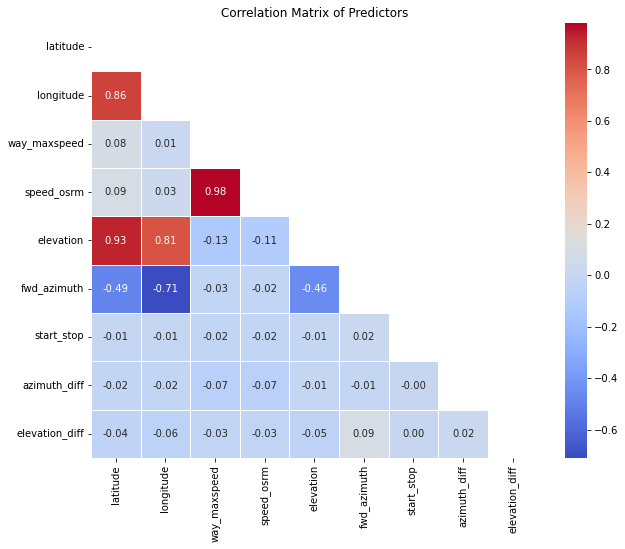

In [43]:
# Calculate correlation matrix for predictors
correlation_matrix = X_pred.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Predictors')
plt.show()

To address the issue of multicollinearity, it is suggested to remove the columns longitude, way_maxspeed, and elevation. However, since determining the target speed of a vehicle relies on multiple factors, including spatial information about the vehicle's location, both latitude and longitude should be taken into account.

# Feature transformation

The maximum allowed speed is measured in km/hr whereas target_speed and speed_osrm are measured in m/s. Hence transforming the target_speed and speed_osrm values to km/hr

In [44]:
# Convert m/s to km/hr for the target_speed and speed_osrm column

vehicle_speed_df['target_speed'] = vehicle_speed_df['target_speed'] * 3.6

vehicle_speed_df['speed_osrm'] = vehicle_speed_df['speed_osrm'] * 3.6

# Feature Creation

Lets create a new feature speed_deviation that computes the difference between target_speed and way_maxspeed to see if the vehicle is driving above or below the allowed speed limit.

In [45]:
vehicle_speed_df['speed_deviation'] = vehicle_speed_df['target_speed'] - vehicle_speed_df['way_maxspeed']

# Drop Irrelevant fields

In [46]:
# Dropping fields that exhibit multicollinearity 

vehicle_speed_df = vehicle_speed_df.drop(['way_maxspeed', 'elevation'], axis=1)

# Dropping irrelevant columns

vehicle_speed_df = vehicle_speed_df.drop(['fwd_azimuth', 'way_surface', 'start_stop', 'azimuth_diff', 'elevation_diff'], axis=1)

# Feature Selection

Based on the insights from the correlation matrix heatmap and other transformation techniques, the useful predictors for the final model include: latitude, longitude, speed_osrm, way_type, speed_deviation and target_speed.

In [47]:
final_df = vehicle_speed_df.copy()

# Encoding Categorical Variables

In [48]:
# Convert categorical variables to dummy variables

final_df = pd.get_dummies(final_df, columns= ['way_type'], drop_first=True)
final_df.head()

,latitude,longitude,target_speed,speed_osrm,speed_deviation,way_type_residential,way_type_secondary,way_type_tertiary,way_type_trunk
0,50.397060,14.913273,143.062042,103.814086,13.062042,0,0,0,0
1,50.397068,14.913283,142.984026,103.952261,12.984026,0,0,0,0
2,50.397076,14.913294,142.906010,104.090425,12.906010,0,0,0,0
3,50.397080,14.913303,142.827991,104.228593,12.827991,0,0,0,0
4,50.397087,14.913314,142.749972,104.366761,12.749972,0,0,0,0


# Data Partitioning

## Separate predictor and target variables

In [49]:
# Separate X and y variables

X = final_df.drop(['target_speed'], axis=1)
y = final_df['target_speed']
predictors = X.columns
outcome = 'target_speed'

## Split dataset into training, test and validation sets

In [50]:
# Split the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Split the test and validation set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [51]:
# Proportions of training, test and validation data

train_prop = len(X_train)/len(final_df)
test_prop = len(X_test)/len(final_df)
valid_prop = len(X_valid)/len(final_df)

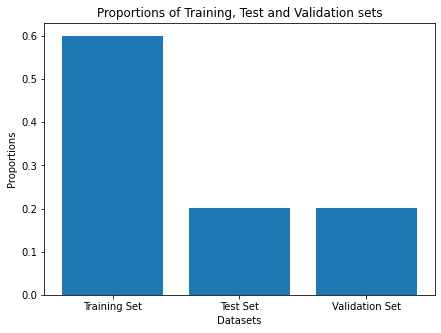

In [52]:
plt.figure(figsize=(7,5))
labels = ['Training Set', 'Test Set', 'Validation Set']
proportions = [train_prop, test_prop, valid_prop]
plt.bar(labels,proportions)
plt.xlabel("Datasets")
plt.ylabel("Proportions")
plt.title("Proportions of Training, Test and Validation sets")
plt.show()

In [53]:
import boto3
import json

# Initialize Boto3 S3 client
s3_client = boto3.client('s3')

# Define the bucket name
bucket_name = 'vpproject'

# Define the filenames for the proportions
file_names = ['train_prop.json', 'test_prop.json', 'valid_prop.json']

# Define the proportions
proportions = {'train_prop': train_prop, 'test_prop': test_prop, 'valid_prop': valid_prop}

# Upload each proportion as a separate JSON file to the S3 bucket
for file_name in file_names:
    proportion_name = file_name.split('.')[0]
    with open(file_name, 'w') as f:
        json.dump(proportions[proportion_name], f)
    s3_client.upload_file(file_name, bucket_name, file_name)



## Linear Learner

In [54]:
import boto3

# Initialize Boto3 S3 client
s3_client = boto3.client('s3')

# Specify your bucket name
bucket_name = 'vpproject'

# List objects in the bucket
response = s3_client.list_objects_v2(Bucket=bucket_name)

# Extract prefixes from the response
prefixes = set()
if 'Contents' in response:
    for obj in response['Contents']:
        key = obj['Key']
        # Extract the prefix (folder) from the key
        prefix = '/'.join(key.split('/')[:-1])
        prefixes.add(prefix)

print("Prefixes in the bucket:")
for prefix in prefixes:
    print(prefix)


Prefixes in the bucket:
license_plate
license_plate/license_1


## XGBoost

In [55]:
!pip install --upgrade sagemaker

  Using cached sagemaker-2.214.2-py3-none-any.whl.metadata (14 kB)
Using cached sagemaker-2.214.2-py3-none-any.whl (1.4 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.199.0
    Uninstalling sagemaker-2.199.0:
      Successfully uninstalled sagemaker-2.199.0

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [56]:
!pip install sagemaker==2.60.0

  Using cached sagemaker-2.60.0-py2.py3-none-any.whl
  Using cached protobuf3_to_dict-0.1.5-py3-none-any.whl
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.214.2
    Uninstalling sagemaker-2.214.2:
      Successfully uninstalled sagemaker-2.214.2

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [57]:
import json
import boto3

# Initialize Boto3 S3 client
s3_client = boto3.client('s3')

# Define the bucket name
bucket_name = 'vpproject'

# Define the file paths
train_prop_file = 'train_prop.json'
test_prop_file = 'test_prop.json'
valid_prop_file = 'valid_prop.json'

# Download the files from S3
s3_client.download_file(bucket_name, train_prop_file, train_prop_file)
s3_client.download_file(bucket_name, test_prop_file, test_prop_file)
s3_client.download_file(bucket_name, valid_prop_file, valid_prop_file)

# Load data from JSON files
with open(train_prop_file, 'r') as f:
    train_prop = json.load(f)

with open(test_prop_file, 'r') as f:
    test_prop = json.load(f)

with open(valid_prop_file, 'r') as f:
    valid_prop = json.load(f)

# Print the loaded data
print("Train Proportion:", train_prop)
print("Test Proportion:", test_prop)
print("Validation Proportion:", valid_prop)

Train Proportion: 0.5999341997038987
Test Proportion: 0.20003290014805067
Validation Proportion: 0.20003290014805067


## Linear Learner

In [58]:
import json
import boto3
import sagemaker
from sagemaker import LinearLearner

# Initialize Boto3 and SageMaker session
s3_client = boto3.client('s3')
sess = sagemaker.Session()
role = sagemaker.get_execution_role()

# Define S3 bucket and file paths
bucket_name = 'vpproject'
train_prop_file = 'train_prop.json'
test_prop_file = 'test_prop.json'
valid_prop_file = 'valid_prop.json'

# Download the files from S3
s3_client.download_file(bucket_name, train_prop_file, train_prop_file)
s3_client.download_file(bucket_name, test_prop_file, test_prop_file)
s3_client.download_file(bucket_name, valid_prop_file, valid_prop_file)

# Load data from JSON files
with open(train_prop_file, 'r') as f:
    train_prop = json.load(f)

with open(test_prop_file, 'r') as f:
    test_prop = json.load(f)

with open(valid_prop_file, 'r') as f:
    valid_prop = json.load(f)

# Print the loaded data
print("Train Proportion:", train_prop)
print("Test Proportion:", test_prop)
print("Validation Proportion:", valid_prop)

# Define the Linear Learner estimator
linear = LinearLearner(role=role,
                       instance_count=1,
                       instance_type='ml.m5.large',
                       predictor_type='regressor',
                       sagemaker_session=sess)

# Train the model
# Note: You may need to convert the data into a format suitable for Linear Learner
# and provide the S3 URIs of your training and validation data.
# Example: linear.fit({'train': s3_train_data, 'validation': s3_validation_data})


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
Train Proportion: 0.5999341997038987
Test Proportion: 0.20003290014805067
Validation Proportion: 0.20003290014805067


## K-Means

In [59]:
import json
import boto3
import sagemaker
from sagemaker import KMeans

# Initialize Boto3 and SageMaker session
s3_client = boto3.client('s3')
sess = sagemaker.Session()
role = sagemaker.get_execution_role()

# Define S3 bucket and file paths
bucket_name = 'vpproject'
train_prop_file = 'train_prop.json'
test_prop_file = 'test_prop.json'
valid_prop_file = 'valid_prop.json'

# Download the files from S3
s3_client.download_file(bucket_name, train_prop_file, train_prop_file)
s3_client.download_file(bucket_name, test_prop_file, test_prop_file)
s3_client.download_file(bucket_name, valid_prop_file, valid_prop_file)

# Load data from JSON files
with open(train_prop_file, 'r') as f:
    train_prop = json.load(f)

with open(test_prop_file, 'r') as f:
    test_prop = json.load(f)

with open(valid_prop_file, 'r') as f:
    valid_prop = json.load(f)

# Print the loaded data
print("Train Proportion:", train_prop)
print("Test Proportion:", test_prop)
print("Validation Proportion:", valid_prop)

# Define the K-Means estimator
kmeans = KMeans(role=role,
                instance_count=1,
                instance_type='ml.m5.large',
                k=5,  # Number of clusters
                sagemaker_session=sess)

# Train the model
# Note: You may need to convert the data into a format suitable for K-Means
# and provide the S3 URI of your training data.
# Example: kmeans.fit({'train': s3_train_data})


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
Train Proportion: 0.5999341997038987
Test Proportion: 0.20003290014805067
Validation Proportion: 0.20003290014805067


## Random Cut Forest (RCF)

In [60]:
import json
import boto3
import sagemaker
from sagemaker import RandomCutForest

# Initialize Boto3 and SageMaker session
s3_client = boto3.client('s3')
sess = sagemaker.Session()
role = sagemaker.get_execution_role()

# Define S3 bucket and file paths
bucket_name = 'vpproject'
train_prop_file = 'train_prop.json'
test_prop_file = 'test_prop.json'
valid_prop_file = 'valid_prop.json'

# Download the files from S3
s3_client.download_file(bucket_name, train_prop_file, train_prop_file)
s3_client.download_file(bucket_name, test_prop_file, test_prop_file)
s3_client.download_file(bucket_name, valid_prop_file, valid_prop_file)

# Load data from JSON files
with open(train_prop_file, 'r') as f:
    train_prop = json.load(f)

with open(test_prop_file, 'r') as f:
    test_prop = json.load(f)

with open(valid_prop_file, 'r') as f:
    valid_prop = json.load(f)

# Print the loaded data
print("Train Proportion:", train_prop)
print("Test Proportion:", test_prop)
print("Validation Proportion:", valid_prop)

# Define the Random Cut Forest (RCF) estimator
rcf = RandomCutForest(role=role,
                      instance_count=1,
                      instance_type='ml.m5.large',
                      num_samples_per_tree=100,
                      num_trees=50,
                      sagemaker_session=sess)

# Train the model
# Note: You may need to convert the data into a format suitable for Random Cut Forest (RCF)
# and provide the S3 URI of your training data.
# Example: rcf.fit({'train': s3_train_data})


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
Train Proportion: 0.5999341997038987
Test Proportion: 0.20003290014805067
Validation Proportion: 0.20003290014805067


## Standardize numerical variables

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets using the same scaler
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=predictors)
X_valid = pd.DataFrame(X_valid_scaled, columns=predictors)
X_test = pd.DataFrame(X_test_scaled, columns=predictors)


## Transfer the training, test and validation data to the s3 bucket

In [62]:
# Function to upload training, test and validation data to s3 bucket

def upload_df_to_s3(df, bucket_name, s3_key):
    csv_buffer = StringIO()
    df.to_csv(csv_buffer, index=False, header=False)
    s3_resource = boto3.resource('s3')
    try:
        s3_resource.Object(bucket_name, s3_key).put(Body=csv_buffer.getvalue())
        print(f"Uploaded DataFrame to s3://{bucket_name}/{s3_key}")
    except Exception as e:
        print(f"Error uploading DataFrame to s3://{bucket_name}/{s3_key}: {e}")

In [63]:
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow",
            "Action": "s3:PutObject",
            "Resource": "arn:aws:s3:::vpproject/*"
        }
    ]
}


{'Version': '2012-10-17',
 'Statement': [{'Effect': 'Allow',
   'Action': 's3:PutObject',
   'Resource': 'arn:aws:s3:::vpproject/*'}]}

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform training, validation, and test data
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define the S3 bucket name
bucket_name = 'vpproject'

# Define the S3 paths for uploading
train_path = 'train_data/train_scaled.csv'
test_path = 'test_data/test_scaled.csv'
valid_path = 'valid_data/valid_scaled.csv'

# Upload scaled DataFrames to S3
upload_df_to_s3(X_train_scaled, bucket_name, train_path)
upload_df_to_s3(X_test_scaled, bucket_name, test_path)
upload_df_to_s3(X_valid_scaled, bucket_name, valid_path)

Uploaded DataFrame to s3://vpproject/train_data/train_scaled.csv
Uploaded DataFrame to s3://vpproject/test_data/test_scaled.csv
Uploaded DataFrame to s3://vpproject/valid_data/valid_scaled.csv


In [65]:
import sagemaker

# Define the bucket name
bucket_name = 'vpproject'

# Define the S3 path for the training data
s3_training_input = sagemaker.inputs.TrainingInput(s3_data='s3://{}/data_files/train_data'.format(bucket_name), content_type='csv')


# Model Training

## Train the model using Sagemaker built-in XGBoost Algorithm

In [66]:
import sagemaker
from sagemaker.xgboost.estimator import image_uris

# Define the bucket name
bucket_name = 'vpproject'

# Retrieve the URI of the latest XGBoost container image
xgboost_container = sagemaker.image_uris.retrieve("xgboost", region, "latest")

# Initialize the XGBoost estimator
xgb = sagemaker.estimator.Estimator(image_uri=xgboost_container,
                                    role=sagemaker.get_execution_role(),
                                    instance_count=1,
                                    instance_type='ml.m5.large',
                                    output_path=f's3://{bucket_name}/output')


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [67]:
# Setting the hyperparameters
xgb.set_hyperparameters(max_depth=5,     # Maximum depth of a tree
                        eta=0.2,         # Learning rate
                        gamma=4,         # Minimum loss reduction required to make a further partition on a leaf node
                        min_child_weight=6,  # Minimum sum of instance weight needed in a child
                        subsample=0.7,   # Subsample ratio of the training instance
                        objective='reg:linear',  # Learning task and the corresponding objective function
                        num_round=100)   # Number of boosting rounds


In [68]:
pip install --upgrade sagemaker

  Using cached sagemaker-2.214.2-py3-none-any.whl.metadata (14 kB)
Using cached sagemaker-2.214.2-py3-none-any.whl (1.4 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.60.0
    Uninstalling sagemaker-2.60.0:
      Successfully uninstalled sagemaker-2.60.0

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install sagemaker experiments

  Using cached experiments-0.1.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached kubernetes-29.0.0-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached google_auth-2.29.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.0-py3-none-any.whl.metadata (3.4 kB)
Using cached experiments-0.1.0-py3-none-any.whl (5.2 kB)
Using cached kubernetes-29.0.0-py2.py3-none-any.whl (1.6 MB)
Using cached google_auth-2.29.0-py2.py3-none-any.whl (189 kB)
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)
Using cached pyasn1_modules-0.4.0-py3-none-any.whl (181 kB)
DEPRECATION: pyodbc 4.0.0-unsupported has 

In [70]:
pip install sagemaker==1.72.0

  Using cached sagemaker-1.72.0-py2.py3-none-any.whl
  Using cached smdebug_rulesconfig-0.1.4-py2.py3-none-any.whl.metadata (943 bytes)
Using cached smdebug_rulesconfig-0.1.4-py2.py3-none-any.whl (10 kB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: smdebug-rulesconfig
    Found existing installation: smdebug-rulesconfig 1.0.1
    Uninstalling smdebug-rulesconfig-1.0.1:
      Successfully uninstalled smdebug-rulesconfig-1.0.1
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.214.2
    Uninstalling sagemaker-2.214.2:
      Successfully uninstalled sagemaker-2.214.2

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To upd

In [71]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.inputs import TrainingInput

# Create a SageMaker session
sagemaker_session = sagemaker.Session()

# Specify the S3 bucket name
bucket_name = 'vpproject'

# Get the execution role
role = get_execution_role()

# Define the container image for XGBoost
container = '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest'

# Define the estimator
xgb = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.m5.large',
                                    output_path='s3://{}/output'.format(bucket_name),
                                    sagemaker_session=sagemaker_session)

# Set hyperparameters
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.7,
                        objective='reg:linear',
                        num_round=100)

# Specify the training data location in S3
train_input = TrainingInput(s3_data='s3://{}/data_files/train_data'.format(bucket_name),
                            content_type='csv')

# Train the model
xgb.fit({'train': train_input})

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18/4204787060.py", line 39, in <module>
    xgb.fit({'train': train_input})
  File "/opt/conda/lib/python3.8/site-packages/sagemaker/workflow/pipeline_context.py", line 346, in wrapper
  File "/opt/conda/lib/python3.8/site-packages/sagemaker/estimator.py", line 1318, in fit
    output_path,
  File "/opt/conda/lib/python3.8/site-packages/sagemaker/utils.py", line 1052, in check_and_get_run_experiment_config
ModuleNotFoundError: No module named 'sagemaker.experiments'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/opt/conda/lib/python3.8/site-packages